In [1]:
import torch                          # Core PyTorch package for tensor operations
from torchvision import datasets, transforms, utils #to prepare and load image data and 
from torch.utils.data import DataLoader # to feed it efficiently into a model
import matplotlib.pyplot as plt

In [2]:
# Define base path to dataset
from pathlib import Path
base_dir = Path("../data/chest_xray")

In [3]:
# Define image transformations
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),             # Resize all images to 224x224 (expected by many pretrained models)
    transforms.RandomHorizontalFlip(),         # Randomly flip images for data augmentation
    transforms.ToTensor(),                     # Convert PIL image to PyTorch tensor (automatically scales to [0, 1])
    transforms.Normalize([0.5], [0.5])          # Normalize with mean and std (for grayscale): [-1, 1] range
])

val_test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),             # Just resize (no augmentation)
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

In [4]:
from torchvision.datasets import ImageFolder

# Create dataset objects for train, val, test
train_dataset = ImageFolder(root=base_dir / "train", transform=train_transforms)
val_dataset   = ImageFolder(root=base_dir / "val", transform=val_test_transforms)
test_dataset  = ImageFolder(root=base_dir / "test", transform=val_test_transforms)

In [ ]:
# Define class names for later use
class_names = train_dataset.classes
# Check labels
print("Class names:", class_names)
print("Class-to-index mapping:", train_dataset.class_to_idx)

# View a sample from the training dataset\
print("First training sample:", train_dataset[0])  # Displays (image_tensor, label_index)

In [5]:
BATCH_SIZE = 32

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)
test_loader  = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

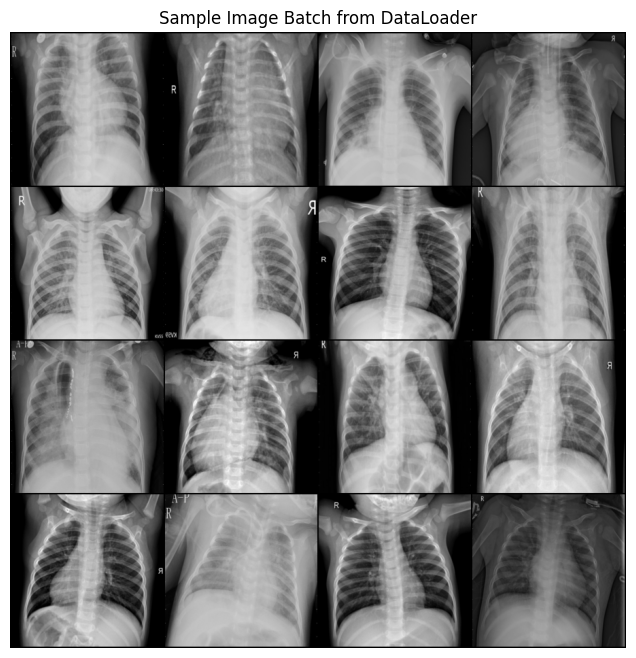

In [6]:
# Function to preview a grid of sample images from a DataLoader
def show_batch(dl, n=16):
    images, labels = next(iter(dl))  # Get one batch of images and labels
    grid = utils.make_grid(images[:n], nrow=4, padding=2, normalize=True)  # Arrange the first 'n' images in a grid

    # Convert the grid tensor to a NumPy array and reorder dimensions for matplotlib
    npimg = grid.numpy().transpose((1, 2, 0))

    # Plot the grid of images
    plt.figure(figsize=(8, 8))
    plt.imshow(npimg, cmap='gray')  # Display as grayscale
    plt.axis('off')                 # Hide axes for a cleaner look
    plt.title('Sample Image Batch from DataLoader')
    plt.show()

# Display a batch from the training set
show_batch(train_loader)